Import Packages 

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd

# Functions

### Function 1
Please finish documenting this function with comments, or in notebook markdown text. Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In this program we are defining `get_sequences_from_file` as a function. The function defined here is a for loop. `SeqIO.parse` reads these records one by one from `fasta_fn` in a fasta format. For each record `decription` is created by `record.description.split()`. This separates the `.description`(fasta header) of each record by its spaces. We can then identify the second and third field of each description as `species_name` with a space between the two parts of the names. Finally, we translate these values into the `sequence_data_dict` dictionary created earlyier and repeat the for loop until all values have been run. We must provide the `fasta_fn` argumnet when working with this function (provistion of a fasta file type). After looping througheach element of the fasta file the function will return the complete dictionary. 

### Function 2
Write a function that translates sequences. All sequences start at codon position 1. Complete a function that translates using a loop over the string of nucleotides.

In [3]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = ""
    n = 0 
    while n < len(string_nucleotides): 
        codon = string_nucleotides[n:n+3]
        if codon in ['TAG','AGG','TAA','AGA']:
            break
        aa = mito_table.forward_table[codon]
        aa_seq_string += aa
        n += 3
    return(aa_seq_string)

In this program we are defining `translate_function` as a function. This function will require `string_nucleotides` as an input argumnet. This argument must be a string of DNA sequence to function properly. To start, the function defines 3 objects. It defines `mito_table` as a table to be used in the translation of codons. It then creates an empty string object identified as `aa_seq_string`. Finally, it creates a counter identified as `n` and sets it to 0. A while loop is then used to collect the next three nucleotides in the sequence starting with the first nucleotide. this loop will run until the `n` counter is larger than the starting argument string. In the while loop, the 3 selected nucleotides are identified as codon. If the codon is a stop codon the loop will stop else it continues and translates the codon using the table provided. It identifies the corresponding amino acid symbol to the codon as `aa`. The loop then adds aa to the string `aa_seq_string`. It then increases the counter and repeats. when the loop is finished it returns the complete string of amino acids.

### Function 3
Is there a better way to write the translation function? (Hint: yes there is.) Perhaps using available BioPython library utilities? Please also write this function.

In [4]:
def alt_trans_function(string_nucleotides): 
    dna_seq = Seq(str(string_nucleotides), IUPAC.unambiguous_dna)
    aa_seq_string = dna_seq.translate(to_stop=True,table="Vertebrate Mitochondrial")
    return(aa_seq_string)

To do this function I used tools from lecture as well as the biopython cookbook:http://biopython.org/DIST/docs/tutorial/Tutorial.html

To complete this function more packages must be imported.

In this program we are defining `alt_trans_function` as a function. We will use the same argument as before in `string_nucleotides`. Like before, for this function to work this argument must be a string. Using biopython allows us to create a seq type object that can hold the DNA sequence from the provided argument and allow us to identify the needed alphabet associated with the sequence. We define this sequence as `dna_seq`. the function then creates an object called `aa_seq_string`. This object contains the translated amino acid sequence created by using `dna_seq` and referencing the translation table. The function will then return the completed amino acid sequence.

### Function 4
Write a function that calculates the molecular weight of each amino acid sequence. For this, you can use some BioPython functions.

In [5]:
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    aa_seq_weight = analysed_seq.molecular_weight()
    return(aa_seq_weight)

https://biopython.org/wiki/ProtParam was very helpful in creating this function.

In this program we are defining `compute_molecular_weight` as a function. The argument in this function is `aa_seq_string`. The argument in the function must be a string of protein sequence to work properly. In this function we first identify the `analysed_seq` object using the `ProteinAnalysis` class. This class takes the selected argument and creates a sequence object. The function then uses the tool `.molecular_weight` to determine the weight of the protein in the object `analysed_seq`. The function then returns the protein weight.

### Function 5
Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [6]:
def GC_Content_Calculator(string_nucleotides):
    counter = 0
    for record in string_nucleotides:
        if record in ['G','C']:
            counter += 1
    return(counter/len(string_nucleotides))

In this program we are defining `GC_Content_Calculator` as a function. The argument in this function is `string_nucleotides`. This argument should be a string. First, this function creates a counter that will be used to determine the number of G's and C's in the sequence. A for loop is then used to run through the sequence. if the record(base) in the sequence is a G or a C 1 is added to the counter. This process repeats until the loop has finished the argument. Finally the function returns the desired result of a proportion of the total.

# Main Script

In [7]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 

bears_df = pd.read_csv("bears_mass.csv") # Includes only data for body mass 
species_list = list(bears_df.species)

In [8]:
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/bears_cytb.fasta', 'bears_cytb.fasta')
urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/bears_mass.csv', 'bears_mass.csv')
urllib.request.urlretrieve('https://raw.githubusercontent.com/EEOB-BioData/BCB546X-Fall2018/master/assignments/Python_Assignment/seqence_translate.py', 'seqence_translate.py')

('seqence_translate.py', <http.client.HTTPMessage at 0x21f6cc49550>)

Import needed packages and retreive required data. 

### Problem 6
Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content.

In [9]:
bears_df

,species,mass
0,Ursus spelaeus,550.800
1,Ursus arctos,203.500
2,Ursus thibetanus,99.714
3,Melursus ursinus,100.030
4,Ursus americanus,110.560
5,Helarctos malayanus,47.020
6,Ailuropoda melanoleuca,118.200
7,Tremarctos ornatus,140.700
8,Ursus maritimus,425.100


Check data frame before inserting new columns

In [10]:
bears_df['molecular weight'] = 'NaN'
bears_df['G/C content'] = 'NaN'

In [11]:
bears_df

,species,mass,molecular weight,G/C content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


Add the two needed columns and check to make sure that the data frame is as it should be

### Problem 7
Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [12]:
for key, value in cytb_seqs.items():
    aa_seq = alt_trans_function(str(value))
    aa_seq_weight = compute_molecular_weight(str(aa_seq))
    aa_seq_GC = GC_Content_Calculator(value)
    bears_df.loc[bears_df['species'].str.contains(key), 'molecular weight'] = aa_seq_weight
    bears_df.loc[bears_df['species'].str.contains(key), 'G/C content'] = aa_seq_GC
bears_df   

,species,mass,molecular weight,G/C content
0,Ursus spelaeus,550.800,42458.8,0.437719
1,Ursus arctos,203.500,42414.7,0.437719
2,Ursus thibetanus,99.714,42306.7,0.45614
3,Melursus ursinus,100.030,42552,0.451754
4,Ursus americanus,110.560,42427.7,0.439474
5,Helarctos malayanus,47.020,42560.9,0.442982
6,Ailuropoda melanoleuca,118.200,42702.2,0.407895
7,Tremarctos ornatus,140.700,42384.8,0.44386
8,Ursus maritimus,425.100,42454.8,0.442982


This for loop looks through all of the records in the `cytb_seqs.items` file. I then take the sequence and translates it into an amino acid sequence. `str()` is used to convert this new sequence into a string. The function for calculating molecular weight and G/C content is then used to determine the molecular weight and G/C content of the given sequence. These values are then inserted into the bears data frame. I used the biopython cookbook to help figure out how to do this.

### Problem 8 
Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
1. What is the largest bear species? 
2. What else is interesting about this species?

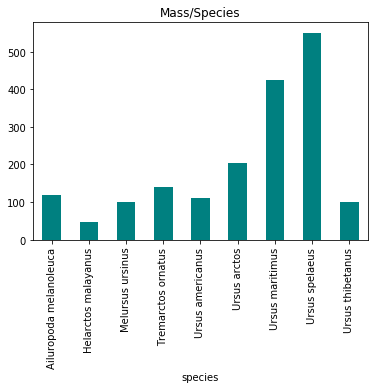

In [13]:
bears_df.groupby('species')["mass"].describe()['mean'].plot(kind="bar", title= "Mass/Species", color="teal")

This code makes a bar chart grouped by species in relation to mean mass of each species. Matplot is used to achieve this. `.plot` gives me options to include a title and change the color. 

#### What are the largest bear species?
- The largest bear species, on average, is Ursus spelaeus. 

#### What else is interesting? 
- Ursus is by far the largest genus by average mass of the genus given in this data set.


### Problem 9 
Plot a graph that shows the molecular weight as a function of GC content.

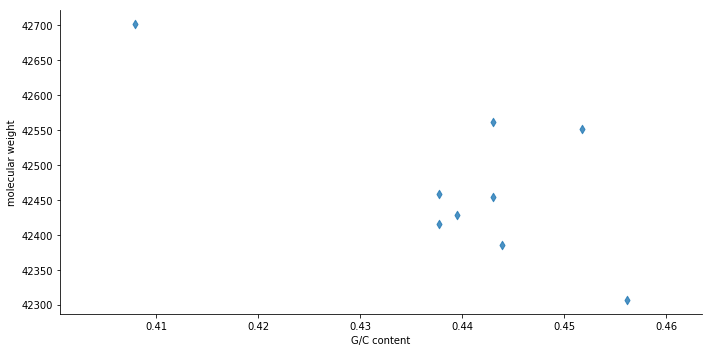

In [14]:
sns.lmplot(x= "G/C content",
           y="molecular weight",
           markers= "d",
           aspect=2,
           data = bears_df,
           fit_reg=False)

Seaborn is the easiest tool to use when plotting. With seaborn lmplot G/C content is identified as the x axis and molecular weight is identified as the y axis. `bears_df` is identified as the data source and diamond style markers are selected.

### Problem 10 
Write the entire DataFrame to a new CSV file that includes your new columns.

In [15]:
bears_df.to_csv("bears_mass_cytb.csv")

https://stackoverflow.com/questions/16923281/pandas-writing-dataframe-to-csv-file

Stack overflow is how I determined how to do this problem. `.to_csv` is a command that allows you to convert and save a data frame as a csv file and select the file name.

### BONUS: Problem 11 
What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun.


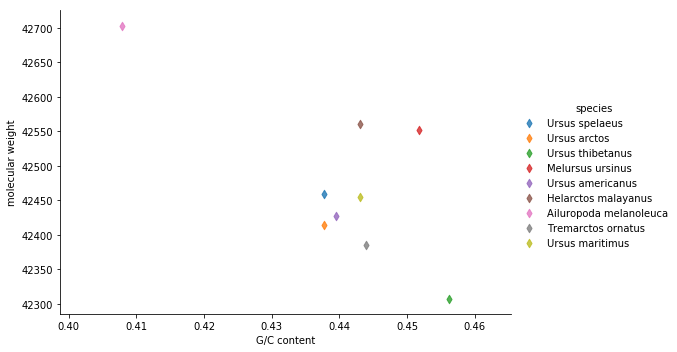

In [16]:
sns.lmplot(x= "G/C content",
           y="molecular weight",
           markers= "d",
           data = bears_df,
           aspect= 1.5,
           hue= "species",
           fit_reg=False)

I wanted to see if the genus of these selected species had an impact on the clustering in the previous plot graph. Using the `hue` option in seaborn I was able to color the plots by their species. I was then able to identify the genus Ailuropoda as the outlier in the data set.